MEAN , MEDIAN , PEAK FINDING

<class 'numpy.ndarray'>


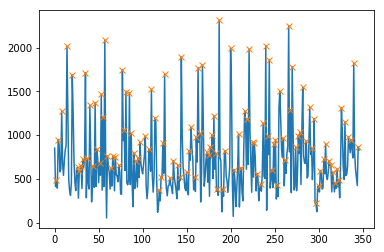

In [46]:
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

import pandas as pd
# data = pd.read_csv("/home/ferry/BigDataTraining/data.csv", index_col=0, usecols=['size'])

# data.values()

data = pd.read_csv("/home/ferry/BigDataTraining/data.csv")
data['size']  # as a Series
data['size'].values  # as a numpy array

peaks,_=find_peaks(data['size'])
index,_=find_peaks(data['size'],distance=1)

plt.plot(data['size'])
plt.plot(index , data['size'][index] , 'x')
plt.show()



# GUI with tkinter

- basic GUI label + input

In [7]:
import tkinter as tk
#definisikan window widget
utama = tk.Tk()

def konversi_inchi_ke_cm():
    global hasil
    hasil = 'Panjang dalam cm: ' + str(float(entry_panjang.get()) * 2.54)
    label_hasil.configure(text = hasil)

#label untuk input
label_keterangan = tk.Label(utama, text = 'Panjang (dalam inchi)') 
label_keterangan.pack()

#entry input 
entry_panjang = tk.Entry(utama, bd = 5)
entry_panjang.pack()

#label hasil
label_hasil = tk.Label(utama, text = 'Panjang dalam cm: ')
label_hasil.pack()

#button memanggil function
tombolhitung = tk.Button(utama, text = 'Hitung!', command = konversi_inchi_ke_cm)
tombolhitung.pack()

#button untuk keluar
tombolkeluar = tk.Button(utama, text = 'Keluar!', fg = 'red', command = quit)
tombolkeluar.pack()

#tkinter event loop
utama.mainloop()

In [6]:
from tkinter import *
from tkinter import filedialog 
from tkinter import messagebox 

root = Tk()

messagebox.showinfo('Pemberitahuan','Ada Pemberitahuan')
messagebox.showerror('Error','Goblok... wkwkwkwkk')
messagebox.showwarning('Warning', 'Salah, goblok, wkwkwkwk...')

jawaban = messagebox.askokcancel('Pertanyaan', 'Apakah Anda Ingin Keluar ?')
jawaban = messagebox.askretrycancel('Pertanyaan', 'Apakah Anda Ingin Coba Lagi?')
jawaban = messagebox.askyesno('Pertanyaan', 'Apakah Data Sudah Benar?')
jawaban = messagebox.askyesnocancel('Pertanyaan', 'Coba Lagi?')

root.filename = filedialog.askopenfilename(initialdir = '/', title = 'Pilih file', filetypes = (('File teks','*.txt'),('semua jenis file','*.*')))
print(root.filename)

/home/ferry/Documents/playlist.txt


- Basic GUI scroll bar

In [10]:
import tkinter as tk
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2010_alcohol_consumption_by_country.csv')
data = data.to_string()

utama = tk.Tk()

scrollbar = tk.Scrollbar(utama)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

kotak_teks = tk.Text(utama, wrap=tk.WORD, yscrollcommand=scrollbar.set)
scrollbar.config(command=kotak_teks.yview)

kotak_teks.insert(tk.INSERT, data)
kotak_teks.pack()

utama.mainloop()

- basic GUI canvas

In [22]:
import tkinter as tk 

utama = tk.Tk()

w = tk.Canvas(utama, width = 200, height = 200)
w.pack()

#memangil gambar
citra = tk.PhotoImage(file = 'qrcode.png')
w.create_image(10,10, anchor = tk.NW, image = citra)

#membuat tombol
button = tk.Button(w,text = 'Quit', command = utama.destroy)
w.create_window(80, 170, anchor = tk.NW, window = button)

utama.mainloop()

- basic GUI canvas + plot

In [14]:
import matplotlib as mpl
import numpy as np
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def update_plot():
    frek = float(input_frek.get())
    y = 1 + np.sin(frek * 2 * np.pi * t)    
    ax.cla()    # hapus yang lama
    ax.plot(t, y, 'r-')
    ax.grid()
    canvas.draw()

# Data for plotting
frek = 1
t = np.arange(0.0, 2.0, 0.01)
y = 1 + np.sin(frek * 2 * np.pi * t)# sinus

fig = mpl.figure.Figure(figsize = (6,5))
ax = fig.add_axes([0.1,0.1,0.85,0.85])
ax.plot(t, y, 'r-')
ax.grid()

utama = tk.Tk()
w = tk.Canvas(utama, width=600, height=500)
w.pack()

canvas = FigureCanvasTkAgg(fig, master=w)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Buat tombol update frekuensi sinus
tombol = tk.Button(utama, text="Update frekuensi", command=update_plot)
tombol.pack()

# Buat entry frekuensi sinus
input_frek = tk.Entry(utama, bd=5)
input_frek.insert(tk.END, '1')
input_frek.pack()

utama.mainloop()


- exercise 1 basic GUI

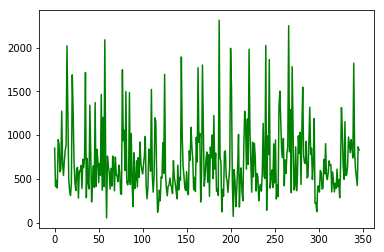

In [35]:
import matplotlib as mpl
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

utama = tk.Tk()
utama.geometry("500x500")

def openBrowse():
    utama.filename = filedialog.askopenfilename(initialdir = '/', title = 'Pilih file', filetypes = (('File teks','*.csv'),('semua jenis file','*.*')))
    data = pd.read_csv(utama.filename)
    drawPlot(data)

def drawPlot(data):    
    data['size']  # as a Series
    data['size'].values  # as a numpy array
    
    fig, ax = plt.subplots()
    ax.plot(data['size'], 'g-')
    canvas = FigureCanvasTkAgg(fig, master=myCanvas)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

browseBtn = tk.Button(utama , text="Browse File" , command=openBrowse)
browseBtn.pack()

myCanvas = tk.Canvas(utama, width=299, height=300)
myCanvas.pack()

utama.mainloop()
